# House Prices: Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

In [1]:
# For notebook plotting
%matplotlib inline

# Standard packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\user\\Desktop\\house prices")

In [3]:
# Read the dataset

train_df= pd.read_csv('train.csv')

In [4]:
print(train_df.shape)

(1460, 81)


In [5]:
print("First five rows")
train_df.head()

First five rows


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(" checking datatypes")
train_df.dtypes

 checking datatypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
col=train_df.select_dtypes(exclude=['int64','float64']).columns

In [9]:
len(col)

43

In [10]:
col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
#Convert all the attributes to appropriate type
for i in col:
    train_df[i] = train_df[i].astype('category')

In [12]:
train_df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu      category
GarageType  

In [13]:
#displaying column names which has null values
num = train_df.select_dtypes(include=['int64','float64']).columns

In [14]:
len(num)

38

In [15]:
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
for i in num:
    train_df[i] = train_df[i].fillna(train_df[i].mean())

In [17]:
for i in col:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

In [18]:
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

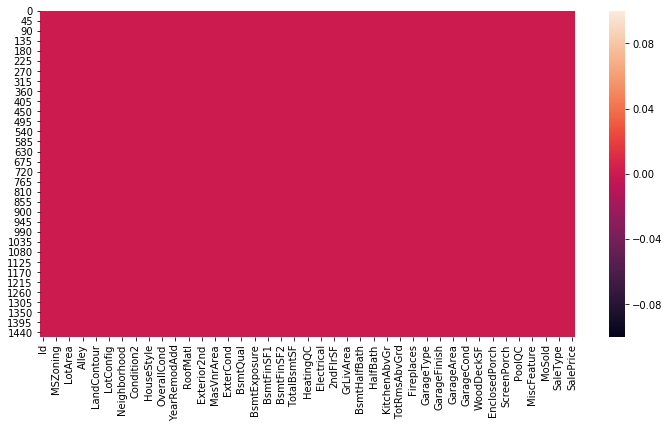

In [19]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull())
plt.show()

In [20]:
#Separate variable into new dataframe from original dataframe which has only numerical values
#there is 38 numerical attribute from 81 attributes

train_corr = train_df.select_dtypes(include=[np.number])

In [21]:
train_corr.shape

(1460, 38)

In [22]:
#Delete Id because that is not need for corralation plot

del train_corr['Id']

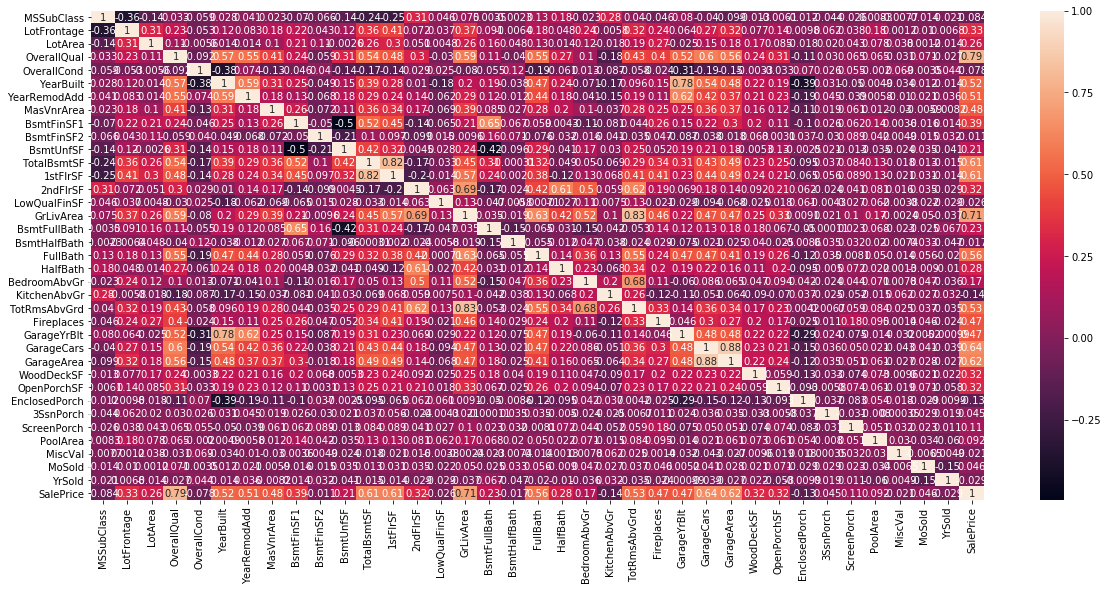

In [23]:
#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Top 50% Corralation train attributes with sale-price

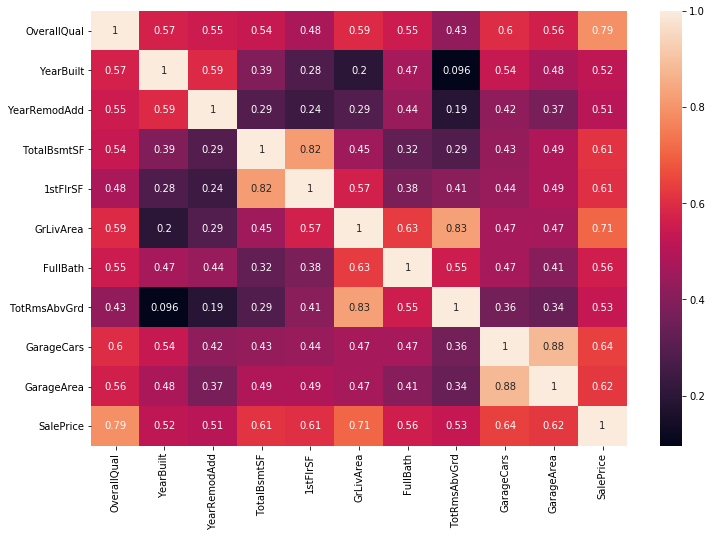

In [24]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train_df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

Here OverallQual is highly correlated with target feature of saleprice by 79%

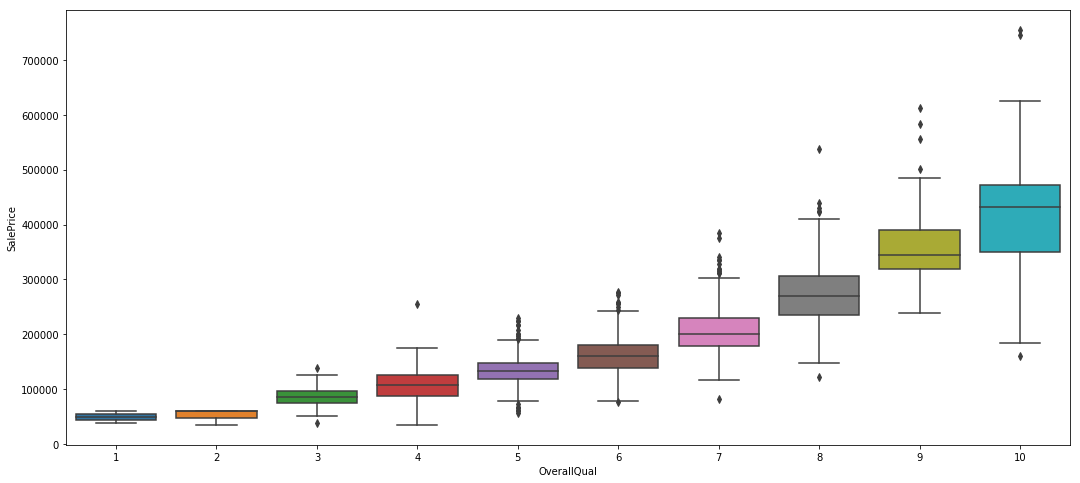

In [25]:
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train_df.OverallQual, y=train_df.SalePrice)

In [26]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [27]:
# dropping the columns which has more then 90% missing values
del train_df["PoolQC"]        
del train_df["MiscFeature"]    
del train_df["Alley"]
del train_df['Id']

In [28]:
train_df.shape

(1460, 77)

# Feature Scaling

In [29]:
col      # in this  col variable missing columns have not deleted

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
col1=col.drop(["Alley","PoolQC","MiscFeature"])

In [31]:
col1

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [32]:
from sklearn.preprocessing import LabelEncoder
for c in col1:
 lbl = LabelEncoder()
 lbl.fit(list(train_df[c].values))
 train_df[c] = lbl.transform(list(train_df[c].values))

## Split data into train and test formate

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
y=train_df["SalePrice"]
X=train_df.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 76)
(292, 76)
(1168,)
(292,)


# standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
num

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [38]:
num1=num.drop(["Id","SalePrice"])

In [39]:
num1

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [40]:
scaler = StandardScaler() ## object intitation
scaler.fit(X_train[num1])
scaler.fit(X_test[num1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train[num1]=scaler.transform(X_train[num1])
X_test[num1]=scaler.transform(X_test[num1])

C:\Users\user\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\envs\py36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\user\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [42]:
X_train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.004099,3.049658,0.008404,-0.052506,0.997432,1.975171,2.779966,0.000856,3.024829,0.061644,...,0.009527,0.021218,0.028444,-0.039860,1.891267,-0.062165,-0.109674,-0.018358,7.515411,3.803938
std,1.047974,0.603560,1.171946,0.515067,0.050637,1.397844,0.705257,0.029260,1.626231,0.277029,...,1.071586,1.149560,1.119592,0.653007,0.429414,0.931687,1.003627,0.977393,1.550554,1.045700
min,-0.902612,0.000000,-2.531330,-0.635276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.372290,-0.113427,-0.273497,-0.082417,0.000000,-0.132663,-2.063778,-1.357245,0.000000,0.000000
25%,-0.902612,3.000000,-0.513304,-0.236193,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,-0.372290,-0.113427,-0.273497,-0.082417,2.000000,-0.132663,-0.949872,-0.617850,8.000000,4.000000
50%,-0.166060,3.000000,0.006723,-0.107199,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,-0.372290,-0.113427,-0.273497,-0.082417,2.000000,-0.132663,-0.207268,0.121544,8.000000,4.000000
75%,0.324974,3.000000,0.469836,0.028265,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,-0.372290,-0.113427,-0.273497,-0.082417,2.000000,-0.132663,0.535336,0.860939,8.000000,4.000000
max,3.271180,4.000000,12.577992,9.879934,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,9.179951,19.315320,9.168205,11.785658,3.000000,29.425026,2.020545,1.600333,8.000000,5.000000


# Fitting Simple Linear Regression to the Training set

In [ ]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [ ]:
#Fit the model
model.fit(X_train, y_train)

# Predicting the Test set results

## linear regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred = model.predict(X_test)

In [ ]:
#Score/Accuracy
print("Model learning score --> ", model.score(X_test, y_test)*100)

In [ ]:
print(mean_absolute_error(y_test,y_pred))

In [ ]:
import math
print(math.sqrt(mean_absolute_error(y_test,y_pred)))

## RandomForestRegression

In [ ]:
#Train the model
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_jobs=-1, max_features='sqrt')


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}

rfc_cv_grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = 10)

In [ ]:
## Fit the grid search model
rfc_cv_grid.fit(X_train, y_train)

In [ ]:
y_pred1 = rfc_cv_grid.predict(X_test)

In [ ]:
print("Model learning score --> ", rfc_cv_grid.score(X_test, y_test)*100)

In [ ]:
print(mean_absolute_error(y_test,y_pred1))

In [ ]:
import math
print(math.sqrt(mean_absolute_error(y_test,y_pred1)))

# GradientBoostingRegressor

In [43]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
model2= GradientBoostingRegressor(n_estimators=100)

In [ ]:
#Fit
model2.fit(X_train, y_train)

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
print("Model learning score --> ", model2.score(X_test, y_test)*100)

In [ ]:
print(mean_absolute_error(y_test,y_pred2))

In [ ]:
import math
print(math.sqrt(mean_absolute_error(y_test,y_pred2)))

# grid search over gradient 

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
           "n_estimators" :  [100, 150, 200],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4],
           "learning_rate" : [0.1, 0.5, 0.9]}

GB_cv_grid = GridSearchCV(estimator = model2, param_grid = param_grid, cv = 10)

In [49]:
## Fit the grid search model
GB_cv_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...ange=None,
                   

In [50]:
y_pred1 = GB_cv_grid.predict(X_test)

In [51]:
print("Model learning score --> ", GB_cv_grid.score(X_test, y_test)*100)

Model learning score -->  88.64339532686881


## Read Test dataset

In [54]:
test_df=pd.read_csv('test.csv')


In [55]:
print(test_df.shape)

(1459, 80)


In [56]:
print("First five rows")
test_df.head()

First five rows


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
print(" checking datatypes")
test_df.dtypes

 checking datatypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [58]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [59]:
colu=test_df.select_dtypes(exclude=['int64','float64']).columns

In [60]:
len(colu)

43

In [61]:
#Convert all the attributes to appropriate type
for i in colu:
    test_df[i] = test_df[i].astype('category')

In [62]:
test_df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
                   ...   
HalfBath            int64
BedroomAbvGr        int64
KitchenAbvGr        int64
KitchenQual      category
TotRmsAbvGrd        int64
Functional       category
Fireplaces          int64
FireplaceQu 

In [63]:
#displaying column names which has null values
nume = test_df.select_dtypes(include=['int64','float64']).columns

In [64]:
len(nume)

37

In [65]:
nume

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [66]:
for i in nume:
    test_df[i] = test_df[i].fillna(test_df[i].mean())

In [67]:
for i in colu:
    test_df[i] = test_df[i].fillna(test_df[i].mode())

In [68]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
Alley            1351
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       729
GarageType         76
GarageYrBlt         0
GarageFinish       78
GarageCars          0
GarageArea          0
GarageQual         78
GarageCond

In [69]:
colnamest=test_df.columns[test_df.isnull().sum()>0]

In [70]:
colnamest

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [71]:
# dropping the columns which has more then 90% missing values
del test_df["PoolQC"]        
del test_df["MiscFeature"]    
del test_df["Alley"]
del test_df["Id"]

In [72]:
test_df.shape

(1459, 76)

In [73]:
# feature scaling

colu1=colu.drop(["Alley","PoolQC","MiscFeature"])

In [74]:
from sklearn.preprocessing import LabelEncoder
for c in colu1:
 lbl = LabelEncoder()
 lbl.fit(list(test_df[c].values))
 test_df[c] = lbl.transform(list(test_df[c].values))

In [75]:
from sklearn.preprocessing import StandardScaler

nume1=nume.drop(["Id"])

In [76]:

scaler = StandardScaler() ## object intitation
scaler.fit(test_df[nume1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
test_df[nume1]=scaler.transform(test_df[nume1])

## Prediction on Test data

In [78]:
prediction=GB_cv_grid.predict(test_df)

## Reading sample data

In [79]:
sub1=pd.read_csv('sample_submission.csv')

In [80]:
sub1.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [81]:
sub1.drop(["SalePrice"],axis=1,inplace=True)

In [82]:
sub1["SalePrice"]=prediction

In [83]:
sub1.to_csv("sample7.csv", index=False)

In [84]:
sub1.head()

,Id,SalePrice
0,1461,135371.916032
1,1462,154605.111162
2,1463,192340.284791
3,1464,191007.928991
4,1465,191904.898688
